# Eindopdracht Advanced Datamining

## Studiejaar 2022-2023, 1e gelegenheid

1. [Inleiding](#Inleiding)
2. [Deel A](#Deel_A)
3. [Deel B](#Deel_B)
3. [Afsluiting](#Afsluiting)

### <a id='Inleiding'>Inleiding</a>

Dit is de *eindopdracht* behorende bij het vak *Advanced Datamining* (BFVH4DMN2) voor het *studiejaar 2022-2023 (1e gelegenheid)*. Op BlackBoard tref je eveneens een module `data.py` aan die diverse functies bevat die helpen bij het genereren en het visualiseren van de gebruikte datasets, en een bijbehorend data-bestand `MNIST-mini.zip`.

Gebruik de `model` module die je in werkcollegeopdrachten 1, 2, 3, 4, en 5 & 6 hebt gemaakt om de onderstaande opdrachten uit te voeren. Deze eindopdracht bestaat uit twee delen:

- in **Deel A** worden een aantal cellen code gedraaid die als het goed is onmiddellijk zouden moeten werken met je model;

- in **Deel B** wordt je gevraagd om je gemaakte model zelf toe te passen, en hoef je je module slechts licht uit te breiden.

<div class="alert alert-danger">

**Waarschuwing:**

De code in je module mag gebruik maken van alle functies uit de [Python Standard Library](https://docs.python.org/3/library/) (zoals `math`, `random`, `itertools`, enzovoorts); het is *niet* toegestaan om functies toe te passen uit bestaande machine learning modules (zoals `sklearn`, `keras`, `tensorflow`, enzovoorts).

</div>

Eerst zetten we weer wat initialisatie op en importeren we naast de `data` en `model` modules enkele onderdelen van `pandas`, `numpy`, en `time`. Plaats de cursor in de cel hieronder en druk op Ctrl+Enter (of Shift+Enter om meteen naar de volgende cel te gaan).

In [8]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from pandas import DataFrame, __version__
print(f'Using pandas version {__version__}')

from numpy import array, __version__
print(f'Using numpy version {__version__}')

from time import perf_counter

import model, data

Using pandas version 1.5.3
Using numpy version 1.23.4


### <a id='Deel_A'>Deel A</a>

Hieronder staan een aantal fragmenten code die je model *ongewijzigd* dient te kunnen uitvoeren. Voor verdere details omtrent deze gevraagde functionaliteiten, zie zonodig de werkcollege-opdrachten en/of de syllabus.

#### Activatiefuncties

In [9]:
my_activations = [model.linear, model.tanh, model.softsign, model.sigmoid, model.softplus, model.relu, model.swish, model.sign]
my_arguments =  [-1000, -1, 0, 1, 1000]
my_table = [[φ(a) for a in my_arguments] for φ in my_activations]
my_columns = [f'φ({a})' for a in my_arguments]
my_rows = [φ.__name__ for φ in my_activations]

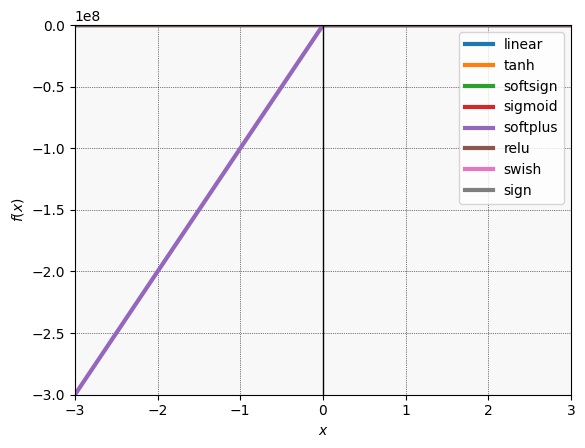

In [10]:
data.graph(my_activations)

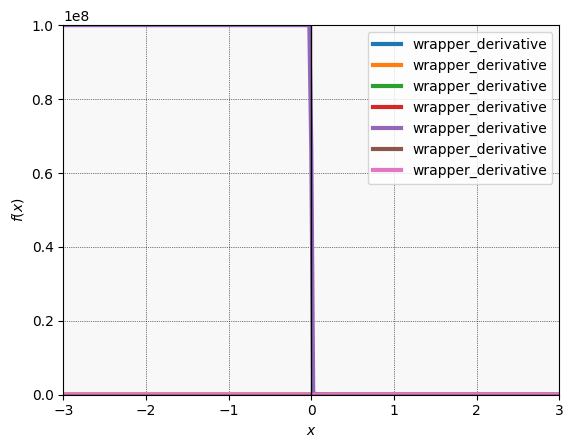

In [11]:
data.graph([model.derivative(φ) for φ in my_activations if φ != model.sign])

In [12]:
DataFrame(my_table, columns=my_columns).set_index(array(my_rows))

,φ(-1000),φ(-1),φ(0),φ(1),φ(1000)
linear,-1.000000e+03,-1.000000e+00,0.000000,1.000000,1.000000e+03
tanh,-1.000000e+00,-7.615942e-01,0.000000,0.761594,1.000000e+00
softsign,-9.990010e-01,-5.000000e-01,0.000000,0.500000,9.990010e-01
sigmoid,1.264581e-01,1.000000e+00,-0.108574,-0.000100,-9.999991e-08
softplus,-1.000001e+11,-1.000921e+08,-92113.614060,0.000000,2.067844e+00
relu,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+03
swish,-1.264581e+02,-1.000000e+00,-0.000000,-0.000100,-9.999991e-05
sign,-1.000000e+00,-1.000000e+00,0.000000,1.000000,1.000000e+00


#### Lossfuncties

In [13]:
my_losses = [model.mean_squared_error, model.mean_absolute_error, model.categorical_crossentropy, model.binary_crossentropy, model.hinge]
my_arguments =  [0.01, 0.1, 0.5, 0.9, 0.99]
my_table = [[L(a, 1.0) for a in my_arguments] for L in my_losses]
my_columns = [f'L({a}; 1)' for a in my_arguments]
my_rows = [L.__name__ for L in my_losses]

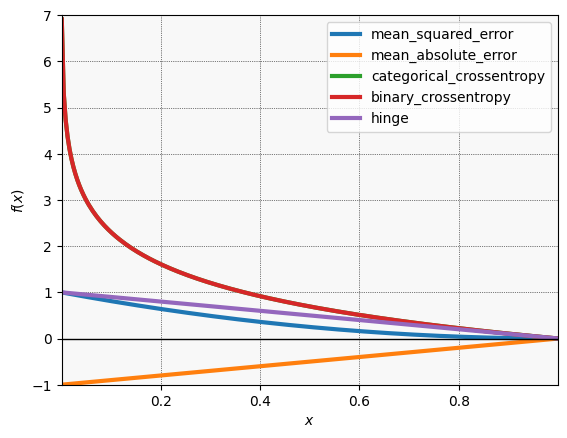

In [14]:
data.graph(my_losses, 1.0, xlim=(0.001, 0.999))

In [15]:
DataFrame(my_table, columns=my_columns).set_index(array(my_rows))

,L(0.01; 1),L(0.1; 1),L(0.5; 1),L(0.9; 1),L(0.99; 1)
mean_squared_error,0.98010,0.810000,0.250000,0.010000,0.00010
mean_absolute_error,-0.99000,-0.900000,-0.500000,-0.100000,-0.01000
categorical_crossentropy,4.60517,2.302585,0.693147,0.105361,0.01005
binary_crossentropy,4.60517,2.302585,0.693147,0.105361,0.01005
hinge,0.99000,0.900000,0.500000,0.100000,0.01000


#### Classificatie: single-layer perceptron

In [16]:
xs, ys = data.linear('nominal')
my_model = model.Perceptron(dim=2)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

AttributeError: module 'model' has no attribute 'Perceptron'

#### Classificatie: support vector machine

In [ ]:
xs, ys = data.linear(outcome='nominal', noise=1.0)
my_model = model.Neuron(dim=2, loss=model.hinge)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

#### Classificatie: binomiale logistische regressie

In [ ]:
xs, ys = data.linear(outcome='nominal', noise=1.0)
ys = [(y + 1.0) / 2.0 for y in ys]   # Convert labels -1/+1 to 0/1
my_model = model.Neuron(dim=2, activation=model.sigmoid, loss=model.binary_crossentropy)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

#### Classificatie: multi-layer perceptron

In [ ]:
xs, ys = data.fractal(4)
my_model = model.InputLayer(2) + \
           model.DenseLayer(20) + model.ActivationLayer(20, activation=model.tanh) + \
           model.DenseLayer(10) + model.ActivationLayer(10, activation=model.tanh) + \
           model.DenseLayer(4) + model.SoftmaxLayer(4) + \
           model.LossLayer(loss=model.categorical_crossentropy)
my_model.fit(xs, ys, alpha=0.5, epochs=100, batch_size=20); my_model.fit(xs, ys, alpha=0.5, epochs=10)
data.scatter(xs, ys, model=my_model)
print(my_model)

#### Regressie: lineaire regressie

In [ ]:
xs, ys = data.linear('numeric', noise=1.0)
my_model = model.LinearRegression(dim=2)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

#### Regressie: neuraal netwerk

In [ ]:
xs, ys = data.concentric(noise=0.1)
my_model = model.InputLayer(2) + \
           model.DenseLayer(20) + model.ActivationLayer(20, activation=model.tanh) + \
           model.DenseLayer(10) + model.ActivationLayer(10, activation=model.tanh) + \
           model.DenseLayer(1) + model.ActivationLayer(1, activation=model.linear) + \
           model.LossLayer(loss=model.mean_squared_error)
my_model.fit(xs, ys, alpha=0.05, epochs=200, batch_size=10); my_model.fit(xs, ys, alpha=0.05, epochs=20)
data.scatter(xs, ys, model=my_model)
print(my_model)

### <a id='Deel_B'>Deel B</a>

In dit deel ga je met een klassieke dataset aan de slag, de [MNIST database](https://en.wikipedia.org/wiki/MNIST_database) die bestaat uit duizenden afbeeldingen van handgeschreven cijfers 0 tot en met 9. Dit wordt wel eens betiteld als het *Hello world!* voorbeeld uit de wereld van deep learning. Beschikbaar op BlackBoard is een bestand **MNIST_mini.dat** (dat je dient te unzippen uit **MNIST_mini.zip**) met een geminiaturiseerde versie met afbeeldingen van 12x12 pixels elk. In totaal zijn er maximaal 60.000 instances beschikbaar, 6.000 van elk cijfer. De functie `data.mnist_mini()` kan gebruikt worden om een aantal instances op te vragen. Deze functie levert de attributen van de instances in de vorm van 144 pixel-intensiteiten tussen 0 en 1, en de klasselabels in de vorm van 10 getalwaarden met het juiste cijfer als een one-hot encoding.

In [ ]:
help(data.mnist_mini)

Hiervan genereren we aanvankelijk om het simpel te houden slechts honderd instances elk voor de trainings-, validatie- en testdata. Onderzoek zelf de organisatie van deze data nader.

In [ ]:
# STAP 1: DATAGENERATIE
xs, ys = data.mnist_mini('./MNIST_mini.dat', num=300)
trn_xs, trn_ys = xs[  0:100], ys[  0:100]
val_xs, val_ys = xs[100:200], ys[100:200]
tst_xs, tst_ys = xs[200:300], ys[200:300]

Hieronder wordt een eenvoudig dummy model aangemaakt; er is weliswaar vanalles aan te merken op dit overgesimplificeerde model, maar hanteer dit als een eerste uitgangspunt.

In [ ]:
# STAP 2: MODELDEFINITIE
my_model = model.InputLayer(144, name='input') + \
           model.DenseLayer(10, name='hidden') + \
           model.ActivationLayer(10, name='output') + \
           model.LossLayer(name='loss')

Vervolgens trainen en evalueren we dit model als volgt. Wederom zijn de gekozen parameters ongetwijfeld niet optimaal.

In [ ]:
# STAP 3: TRAINING
my_history = my_model.fit(trn_xs, trn_ys, alpha=0.01, epochs=3, batch_size=1, validation_data=(val_xs, val_ys))

Echter, hiermee kunnen we een validatiecurve construeren.

In [ ]:
# STAP 4: VALIDATIECURVE
data.curve(my_history)

Om inzicht te krijgen in de prestaties van het model, worden hieronder twintig instances uit de testdata getoond met voor en na de pijl respectievelijk de juiste en de voorspelde klasselabels.

In [ ]:
# STAP 5: VISUALISATIE
data.digits(tst_xs[:20], tst_ys[:20], model=my_model)

Berekenen we eens de gemiddelde loss op alle testdata.

In [ ]:
# STAP 6: EVALUATIE
print(f'Loss: {my_model.evaluate(tst_xs, tst_ys)}')

Dit getal zegt misschien nog niet zoveel. Daarom bekijken we een grafische weergave van de [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) die weergeeft welke voorspelde klasselabels op de $x$-as aan alle echte klasselabels op de $y$-as worden toegekend (let op de logaritmische kleurschaal).

In [ ]:
# STAP 7: CONFUSIONMATRIX
data.confusion(tst_xs, tst_ys, model=my_model)

Hoewel er best wat fouten worden gemaakt liggen er toch behoorlijk wat juist geclassificeerde instances op de diagonaal. Daarnaast, een aantal van de meest gemaakte fouten betreft cijfers dit ook wel enigszins op elkaar lijken. Dit overdreven simpele model bereikt - afhankelijk van de willekeurig gekozen instances en initialisatiewaarden - een nauwkeurigheid van rond de 50%, wat wil zeggen dat ongeveer de helft van de cijfers correct wordt herkend. Dit is nog niet indrukwekkend goed, maar gezien de eenvoudige opbouw van het model al best verrassend en in elk geval ruim boven de 10% nauwkeurigheid die je mag verwachten op grond van kans alleen.

***

Pas nu hieronder eens het bovenstaande model aan tot een neuraal netwerk dat deze afbeeldingen redelijk betrouwbaar kan classificeren. Kies zelf een geschikte opzet van het model en bepaal door te experimenteren geschikte waarden voor de diverse parameters. Voer dezelfde zeven stappen uit als hierboven, maar dan met een effectiever en beter geoptimaliseerd model.

**Opdracht:** Gebruik tenminste ergens in je model de "Hard Tanh" activatiefunctie. Zoek hier zonodig informatie over op en implementeer deze in je module.

In [ ]:
# Verander deze cel niet
starttime = perf_counter()

In [ ]:
# STAP 1: DATAGENERATIE
# Voer hier je eigen code uit ...


In [ ]:
# STAP 2: MODELDEFINITIE
# Voer hier je eigen code uit ...


In [ ]:
# STAP 3: TRAINING
# Voer hier je eigen code uit ...


In [ ]:
# STAP 4: VALIDATIECURVE
# Voer hier je eigen code uit ...


In [ ]:
# STAP 5: VISUALISATIE
# Voer hier je eigen code uit ...


In [ ]:
# STAP 6: EVALUATIE
# Voer hier je eigen code uit ...


In [ ]:
# STAP 7: CONFUSIONMATRIX
# Voer hier je eigen code uit ...


In [ ]:
# Verander deze cel niet
print(f'Verstreken tijd: {(perf_counter() - starttime) / 60.0:.1f} minuten.')

<div class="alert alert-warning">

**Hint:**

Voer achtereenvolgens de onderstaande ontwikkelstappen uit.

</div>

* creëer eerst een model met meerdere hidden layers waarin gezamenlijk in de ordegrootte van een honderdtal neuronen verwerkt zijn;

* stel dan de invoer- & uitvoerlagen en activatie- & loss-functies zo in dat het model geschikt is voor deze classificatie-taak;

* begin met een datasetje van zeer beperkte grootte zodat het model in niet meer dan ongeveer een minuut over een klein aantal epochs te trainen is;

* kies een grootte voor de mini-batches die naar jouw inschatting net genoeg is om een enigszins representatieve steekproef van de data te vormen;

* probeer aanvankelijk een relatief grote learning rate uit en stel deze bij naar beneden zolang het model niet in staat is een dalende validatie-curve te tonen;

* start met enkele epochs en voer dit op totdat de validatiecurve aangeeft dat het model redelijk getraind raakt (de trainingstijd neemt hierbij evenredig toe);

* vergroot dan geleidelijk de grootte van de datasets (waarbij het nodige aantal epochs afneemt omdat er per epoch meer mini-batches getraind worden);

* je mag alle 60.000 instances uiteindelijk gebruiken, maar dat is niet verplicht;

* speel met de bovenstaande procedure tot je een model hebt gevonden dat in een werkbare tijd toch naar tevredenheid convergeert.

<div class="alert alert-info">

**Opmerking:**

Ter indicatie, een deugdelijk model is in zijn uiteindelijke vorm op een typische hedendaagse CPU na enkele tientallen minuten training (eis: maximaal 1 uur) in staat om ruim 90% (eis: minimaal 80%) accuracy te behalen zonder daarbij zichtbaar te overfitten.

</div>

### <a id='Afsluiting'>Afsluiting</a>

Als je klaar bent, lever dan je uitwerkingen als volgt in:

1. Sla je model vanuit je code-editor op als **model.py**;

2. Evalueer dit notebook door vanuit het menu *Kernel > Restart & Run All* te kiezen;

3. Controleer dat alle uitvoer correct en volledig wordt geproduceerd;

4. Exporteer dit notebook als **Eindopdracht_v2223.1.html** vanuit het menu *File > Download as > HTML (.html)*;

5. Verwijder vervolgens de uitvoer in dit notebook via het menu *Cell > All Output > Clear*;

6. Sla dit notebook op als **Eindopdracht_v2223.1.ipynb** middels het menu *File > Save and Checkpoint*;

7. Comprimeer alledrie de hierboven genoemde bestanden in één bestand **Eindopdracht_v2223.1.zip**;

8. Lever je zip-bestand uiterlijk **woensdag 19 april 2023** (23:59) in op BlackBoard;

9. E-mail de docent met je voorkeurstijdstippen voor het mondelinge tentamen.

<div class="alert alert-info">

**Opmerking:**

Het mondelinge tentamen vindt typisch plaats in de werkweek volgend op de week van inleveren; als je vóór kwartaal 4 een beoordeling voor dit vak wil hebben dien je dus uiterlijk in de eerste tentamenweek je uitwerkingen in te leveren.

</div>

<div class="alert alert-danger">

**Waarschuwing:**

Verifieer dat je het juiste bestand uploadt, want eenmaal ingestuurd werk geldt als definitief!

</div>

Succes!

***

<small>&copy; 2023, Dave R.M. Langers, [d.r.m.langers@pl.hanze.nl](mailto:d.r.m.langers@pl.hanze.nl)</small>